In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
import matplotlib.font_manager as font_manager
import matplotlib.patches as mpatches
from matplotlib import ticker

In [28]:
plt.rc('font',family='simsun')

In [29]:
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

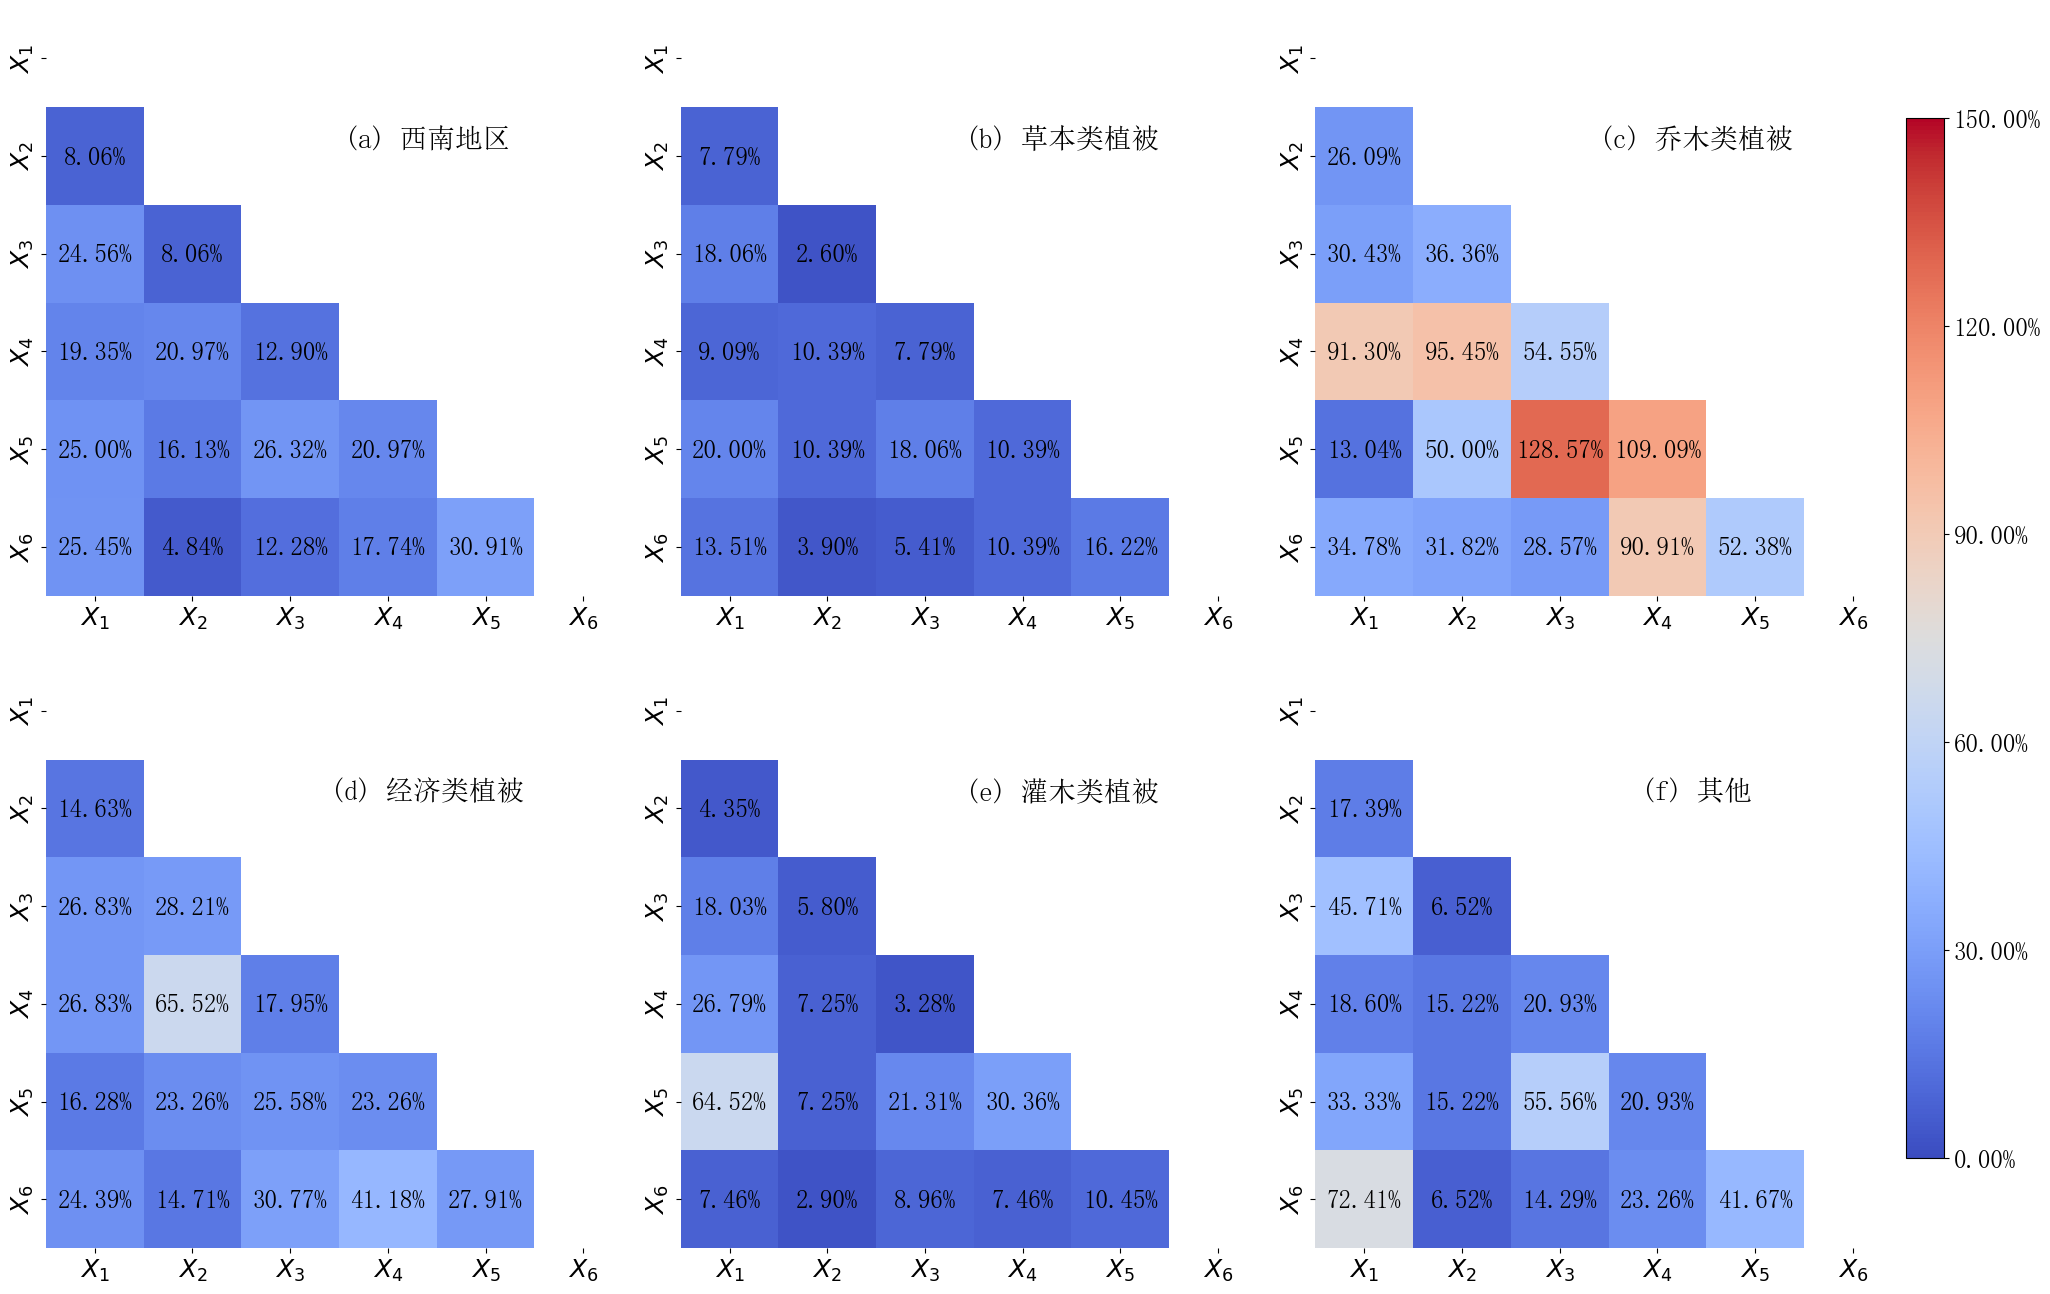

In [85]:
index = [1,2,3,4,5,6]
formatter = mpl.ticker.StrMethodFormatter('{x:.2%}')
font_size = 18
title = ['(a) 西南地区','(b) 草本类植被','(c) 乔木类植被','(d) 经济类植被','(e) 灌木类植被','(f) 其他']

locator = mpl.ticker.MultipleLocator(0.3)

# %config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, constrained_layout=True, figsize=(19, 13))
# fig.subplots_adjust(hspace=0.1)
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

for i in index:
    plt.subplot(2,3,i)
    # ax = axs[i]
    inputindex =  str(i) 
    corr_data =  pd.read_excel("../data/data4.xlsx",sheet_name=inputindex)
    corr_data_new =  corr_data.rename(columns={'X1':'$X_1$','X2':'$X_2$','X3':'$X_3$','X4':'$X_4$','X5':'$X_5$','X6':'$X_6$'}, 
                                    index={0: '$X_1$',1: '$X_2$',2: '$X_3$',3: '$X_4$',4: '$X_5$',5: '$X_6$'})
    mask = np.zeros_like(corr_data_new)
    mask[np.triu_indices_from(mask)] = True

    plt.title(title[i-1],x=0.65,y=0.75,fontsize=20) # set subplot titles

    # print(corr_data_new)
    ax = sns.heatmap(
        corr_data_new, # 相关性系数值数据
        annot=True, # 是否显示数据
        center=0.5, # 设置色彩居中值
        # mask = mask, # 数据显示在mask为False的单元格中
        fmt='.2%', # 设置数值显示的小数位数
        linewidths=0.3, # 设置每个单元格之间的间距线
        linecolor="white", # 设置间距线的颜色
        vmin=0, # 设置数值最小值
        vmax=1, # 设置数值最大值
        xticklabels= True, # 是否显示X轴字段
        yticklabels= True, # 是否显示Y轴字段
        square=True, # 是否每个方格都是正方形
        cbar=False, # 是否绘制颜色条
        # cmap="coolwarm_r", # 设置热力图颜色配色
        cmap="coolwarm", # 设置热力图颜色配色
        annot_kws={"fontsize":font_size,'color':'black'}, # 设置热力图字号
        )
    a = ax.pcolormesh(corr_data_new, vmin=0, vmax=1.5, cmap="coolwarm")

    ax.tick_params(labelsize=font_size)
    # plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0)
# texts = annotate_heatmap(ax, valfmt="{x:.1f} t")
cb_ax = fig.add_axes([1.0, 0.1, 0.02, 0.8]) #设置colarbar位置
# plt.rcParams['font.size'] = 13
cbar = fig.colorbar(a, cax=cb_ax,format=formatter,ticks=locator)     #共享colorbar
cbar.ax.tick_params(labelsize = font_size)
plt.rcParams["font.sans-serif"]=["simsun"] #设置字体
# matplotlib.rc("font",family='simsun')
# yes_patch = mpatches.Patch(color='chartreuse', label='Y 显著性差异')
# no_patch = mpatches.Patch(color='orange', label='N 无显著性差异')
# fig.legend(handles=[yes_patch, no_patch],loc=1,prop = {'size':18},bbox_to_anchor=(1, 0.85))
# plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))


# plt.tight_layout()
plt.show()
fig.savefig('heatmap_percent.png', bbox_inches='tight', dpi=600)